In [1]:
import pandas as pd
import h5py
import numpy as np
import seaborn as sns
import glob
from functools import reduce
sns.set()

import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
import datasets.dcase_few_shot_bioacoustic as util

In [2]:
hdf_eval = h5py.File('../data/dcase_few_shot_bioacoustic/hfiles/val/a1.h5', 'r')

In [3]:
hdf_eval.keys()

<KeysViewHDF5 ['feat_neg', 'feat_pos', 'feat_query', 'mean_global', 'start_index_query', 'std_global']>

In [4]:
hdf_eval['start_index_query'][:][0]

27779.0

<AxesSubplot:>

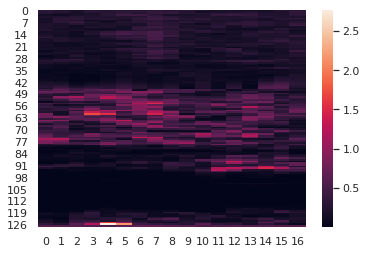

In [5]:
sns.heatmap(np.flipud(np.transpose(hdf_eval['feat_query'][0])))

<AxesSubplot:>

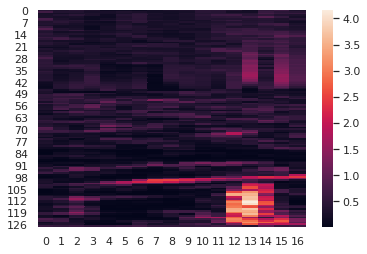

In [6]:
sns.heatmap(np.flipud(np.transpose(hdf_eval['feat_pos'][5])))

<AxesSubplot:>

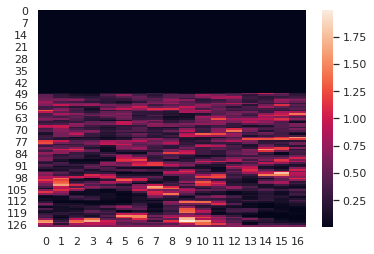

In [7]:
sns.heatmap(np.flipud(np.transpose(hdf_eval['feat_neg'][10])))

# Analysis of annotations

In [22]:
train_annotation_files = glob.glob('../data/dcase_few_shot_bioacoustic/train/*.csv')
val_annotation_files = glob.glob('../data/dcase_few_shot_bioacoustic/val/*.csv')
test_annotation_files = glob.glob('../data/dcase_few_shot_bioacoustic/test/*.csv')

# Validation

In [9]:
pos_event_lengthss = []
unk_event_lengthss = []
for filename in val_annotation_files:
    print(filename)
    df = pd.read_csv(filename)
    # find index of rows with 'POS' value
    idx_pos = (df=='POS').apply(lambda x: reduce(np.logical_or,x), axis=1)
    idx_unk = (df=='UNK').apply(lambda x: reduce(np.logical_or,x), axis=1)
    
    # extract positive events
    df_pos = df[idx_pos]
    pos_event_lengths = df_pos['Endtime'] - df_pos['Starttime']
    pos_event_lengthss.append(pos_event_lengths)
    
    # extract unknown events
    df_unk = df[idx_unk]
    unk_event_lengths = df_unk['Endtime'] - df_unk['Starttime']
    unk_event_lengthss.append(unk_event_lengths)

all_pos_event_lengths = np.concatenate(pos_event_lengthss)
all_unk_event_lengths = np.concatenate(unk_event_lengthss)

../data/dcase_few_shot_bioacoustic/val/n1.csv
../data/dcase_few_shot_bioacoustic/val/BUK5_20161101_002104a.csv
../data/dcase_few_shot_bioacoustic/val/BUK1_20181013_023504.csv
../data/dcase_few_shot_bioacoustic/val/a1.csv
../data/dcase_few_shot_bioacoustic/val/BUK1_20181011_001004.csv
../data/dcase_few_shot_bioacoustic/val/BUK5_20180921_015906a.csv
../data/dcase_few_shot_bioacoustic/val/BUK4_20171022_004304a.csv
../data/dcase_few_shot_bioacoustic/val/BUK4_20161011_000804.csv


310


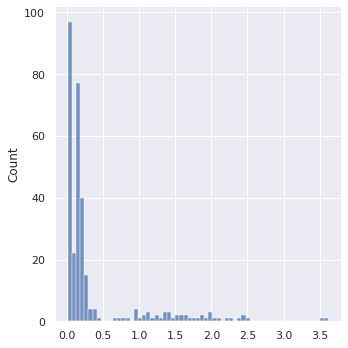

In [10]:
sns.displot(all_pos_event_lengths)
print(len(all_pos_event_lengths))

134


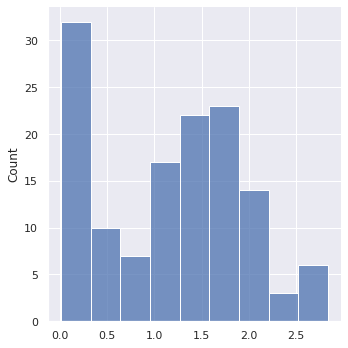

In [11]:
sns.displot(all_unk_event_lengths)
print(len(all_unk_event_lengths))

# Training

In [36]:
pos_event_lengthss = []
unk_event_lengthss = []
for filename in train_annotation_files:
    print(filename)
    df = pd.read_csv(filename)
    # find index of rows with 'POS' value
    idx_pos = (df=='POS').apply(lambda x: reduce(np.logical_or,x), axis=1)
    idx_unk = (df=='UNK').apply(lambda x: reduce(np.logical_or,x), axis=1)
    
    # extract positive events
    df_pos = df[idx_pos]
    pos_event_lengths = df_pos['Endtime'] - df_pos['Starttime']
    pos_event_lengthss.append(pos_event_lengths)
    
    # extract unknown events
    df_unk = df[idx_unk]
    unk_event_lengths = df_unk['Endtime'] - df_unk['Starttime']
    unk_event_lengthss.append(unk_event_lengths)

all_pos_event_lengths = np.concatenate(pos_event_lengthss)
all_unk_event_lengths = np.concatenate(unk_event_lengthss)

../data/dcase_few_shot_bioacoustic/train/dcase_MK1.csv
../data/dcase_few_shot_bioacoustic/train/2015-10-14_23-59-59_unit05.csv
../data/dcase_few_shot_bioacoustic/train/e1.csv
../data/dcase_few_shot_bioacoustic/train/sp4f1_2015_04_24-05_00_00_0002.csv
../data/dcase_few_shot_bioacoustic/train/2015-09-25_04-00-00_unit10.csv
../data/dcase_few_shot_bioacoustic/train/2015-09-11_06-00-00_unit07.csv
../data/dcase_few_shot_bioacoustic/train/h1.csv
../data/dcase_few_shot_bioacoustic/train/dcase_MK2.csv
../data/dcase_few_shot_bioacoustic/train/2015-09-04_08-04-59_unit03.csv
../data/dcase_few_shot_bioacoustic/train/2015-09-21_06-00-00_unit05.csv
../data/dcase_few_shot_bioacoustic/train/y1.csv


In [47]:
print(np.sum(all_pos_event_lengths > 0.0))
print(np.sum(all_pos_event_lengths < 0.2))
#to_plot = np.random.choice(all_pos_event_lengths, 50, replace=False)
#print(to_plot)
#sns.histplot(to_plot)
#print(len(all_pos_event_lengths))

4685
4178


In [116]:
len(np.random.choice(all_unk_event_lengths, 500, replace=False))

500

# Understand evaluation metric

In [35]:
dataset = 'VAL'
if dataset == 'VAL':
    ref_file_path = '../data/dcase_few_shot_bioacoustic/Validation_Set/'
else:
    ref_file_path = '../data/dcase_few_shot_bioacoustic/Test_Set/'
seed = 10
preprocessing = '' #'PP_' # set to '' for no pre processing
gt_file_structure = {}
gt_file_structure[dataset] = {}
inv_gt_file_structure = {}

# create data structures for evaluation
list_of_subsets = os.listdir(ref_file_path)
for subset in list_of_subsets:
    gt_file_structure[dataset][subset] = [os.path.basename(fl)[0:-4]+'.wav' for fl in glob.glob(os.path.join(ref_file_path,subset,"*.csv"))]
    for audiofile in gt_file_structure[dataset][subset]:
        inv_gt_file_structure[audiofile] = subset

# load the test predictions
pred_csv = pd.read_csv('predictions/{}/{}{}_out.csv'.format(seed, preprocessing, dataset))
pred_events_by_audiofile = dict(tuple(pred_csv.groupby('Audiofilename')))

# compute the test score for each file
for audiofilename in list(pred_events_by_audiofile.keys()):
    ref_events_this_audiofile_all = pd.read_csv(
        os.path.join(
            ref_file_path,
            inv_gt_file_structure[audiofilename],
            audiofilename[0:-4]+'.csv'), 
        dtype={'Starttime': np.float64, 'Endtime':np.float64})
    tp_count, fp_count, fn_count, total_n_events_in_audiofile = util.compute_tp_fp_fn(
        pred_events_by_audiofile[audiofilename],
        ref_events_this_audiofile_all
    )
    
    precision = tp_count / (tp_count + fp_count)
    recall    = tp_count / (tp_count + fn_count)

    print("##################################")
    print("File: {}".format(audiofilename))
    print("Precision (many fp): {}".format(precision))
    print("Recall    (many fn): {}".format(recall))

##################################
File: BUK1_20181011_001004.wav
Precision (many fp): 0.03608247422680412
Recall    (many fn): 0.7777777777777778
##################################
File: BUK1_20181013_023504.wav
Precision (many fp): 0.06666666666666667
Recall    (many fn): 0.1724137931034483
##################################
File: BUK4_20161011_000804.wav
Precision (many fp): 0.09090909090909091
Recall    (many fn): 0.11538461538461539
##################################
File: BUK4_20171022_004304a.wav
Precision (many fp): 0.18072289156626506
Recall    (many fn): 0.6818181818181818
##################################
File: BUK5_20161101_002104a.wav
Precision (many fp): 0.14508928571428573
Recall    (many fn): 0.6989247311827957
##################################
File: BUK5_20180921_015906a.wav
Precision (many fp): 0.004594180704441042
Recall    (many fn): 0.10714285714285714
##################################
File: a1.wav
Precision (many fp): 0.02021174205967276
Recall    (many fn): 0.

## Compare with intersection over union

In [232]:
def compute_interval_intersection(i1, i2):
    (a_s, a_e) = i1
    (b_s, b_e) = i2
    if b_s > a_e or a_s > b_e:
        return 0
    else:
        o_s = max(a_s, b_s)
        o_e = min(a_e, b_e)
        return o_e - o_s

def compute_intersection(df_pred, df_true):
    pred_starttimes = df_pred['Starttime']
    pred_endtimes = df_pred['Endtime']
    
    true_starttimes = df_true['Starttime']
    true_endtimes = df_true['Endtime']
    
    intersections = []
    for i in range(len(pred_starttimes)):
        a_s = pred_starttimes[i]
        a_e = pred_endtimes[i]
        for j in range(len(true_starttimes)):
            b_s = true_starttimes[j]
            b_e = true_endtimes[j]
            
            i1 = (a_s, a_e)
            i2 = (b_s, b_e)
            
            intersection = compute_interval_intersection(i1, i2)
            intersections.append(intersection)
    return sum(intersections)

def recursive_merge(intervals):
    _intervals = []
    (a_s, a_e) = intervals[0]
    for j in range(1, len(intervals)): # compare to rest
        (b_s, b_e) = intervals[j]

        # check if overlap
        if not (b_s > a_e or a_s > b_e):
            a_s = min(a_s, b_s)
            a_e = max(a_e, b_e)
        else:
            _intervals.append((b_s, b_e))

    _intervals.append((a_s, a_e))
    
    if len(_intervals) == len(intervals):
        return _intervals
    else:
        return recursive_merge(_intervals)
        

def compute_union(df_pred, df_true):
    pred_starttimes = df_pred['Starttime']
    pred_endtimes = df_pred['Endtime']
    
    true_starttimes = df_true['Starttime']
    true_endtimes = df_true['Endtime']
    
    intervals = []
    for i in range(len(pred_starttimes)):
        a_s, a_e = pred_starttimes[i], pred_endtimes[i]
        intervals.append((a_s, a_e))
    for i in range(len(true_starttimes)):
        a_s, a_e = true_starttimes[i], true_endtimes[i]
        intervals.append((a_s, a_e))
    
    merged_intervals = recursive_merge(intervals)
        
    total_union = 0
    for x in merged_intervals:
        (a_s, a_e) = x
        union = a_e - a_s
        total_union += union
    return total_union

def intersection_over_union(df_pred, df_true):
    intersection = compute_intersection(df_pred, df_true)
    union = compute_union(df_pred, df_true)
    
    return intersection / union
        
#iou = intersection_over_union(df_pred, df_true)
#print("POS IoU: ", iou)

In [252]:
df_true = pd.read_csv('true.csv')
df_pred = pd.read_csv('pred.csv')

In [253]:
df_true

,Audiofilename,Starttime,Endtime,Q
0,test.wav,0.0,1.0,POS


In [254]:
df_pred

,Audiofilename,Starttime,Endtime,Q
0,test.wav,0.0,0.3,POS
1,test.wav,0.4,0.6,POS
2,test.wav,0.7,1.0,POS


In [258]:
(tp, fp, fn, total_pos) = util.compute_tp_fp_fn(df_pred, df_true)
print("tp: ", tp)
print("fp: ", fp)
print("fn: ", fn)
print("total events: ", total_pos)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1_score = 2*(precision*recall) / (precision + recall)
print("precision: ", precision)
print("recall: ", recall)
print("f1_score: ", f1_score)

tp:  1
fp:  2
fn:  0
total events:  1
precision:  0.3333333333333333
recall:  1.0
f1_score:  0.5


In [246]:
iou = intersection_over_union(df_pred, df_true)
print("intersection-over-union: ", iou)

intersection-over-union:  1.0


In [215]:
sorted([(0,4), (2,6), (-1, 5)])

[(-1, 5), (0, 4), (2, 6)]